In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
@dataclass
class DiscriminantFunction:
    A: np.ndarray
    B: np.ndarray
    C: float
    
    def __call__(self, x: np.ndarray):
        return x.T.dot(self.A).dot(x) + self.B.T.dot(x) + self.C
    
    def __str__(self):
        x1, x2 = sp.symbols('x1 x2')
        X = sp.Matrix([x1, x2])
        A = sp.Matrix(self.A)
        B = sp.Matrix(self.B)
        C = self.C
        Xt_A_X = sp.det(X.T @ A @ X)
        Bt_X = sp.det(B.T @ X)
        return str(Xt_A_X + Bt_X + C).replace('**', '^')

In [3]:
def g_of_x(X: np.ndarray, prob: float):
    X_mean = X.mean(axis=0)
    X_cov = cov(X)
    X_cov_inv = np.linalg.inv(X_cov)
    X_cov_det = np.linalg.det(X_cov)
    
    A = -0.5 * X_cov_inv
    B = X_cov_inv.dot(X_mean)
    C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) - 0.5 * np.log(X_cov_det) + np.log(prob)
    return DiscriminantFunction(A, B, C)

In [4]:
def cov(X: np.ndarray):
    X = X - X.mean(axis=0)
    return np.dot(X.T, X) / (X.shape[0]-1)

In [5]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = g1(np.array([X[i, j], Y[i, j]])) - g2(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 6, -6, 10]) # Zoom axis to [xmin, xmax, ymin, ymax]

In [6]:
w1 = np.array([
    [2, 6],
    [3, 4],
    [3, 8],
    [4, 6]
])
w2 = np.array([
    [3, 0],
    [1, -2],
    [3, -4],
    [5, -2]
])
print(f"w1: {w1}")
print(f"w2: {w2}")

w1: [[2 6]
 [3 4]
 [3 8]
 [4 6]]
w2: [[ 3  0]
 [ 1 -2]
 [ 3 -4]
 [ 5 -2]]


In [7]:
g1 = g_of_x(w1, 0.5)
g2 = g_of_x(w2, 0.5)
print(f"g1(x) = {g1}")
print(f"g2(x) = {g2}")

g1(x) = -0.75*x1^2 + 4.5*x1 - 0.1875*x2^2 + 2.25*x2 - 14.4808292530117
g2(x) = -0.1875*x1^2 + 1.125*x1 - 0.1875*x2^2 - 0.75*x2 - 4.11147643357167


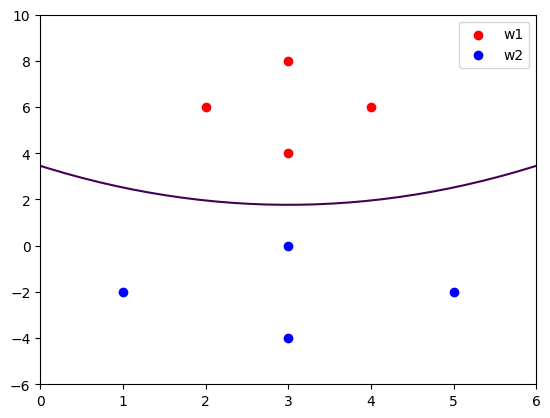

In [8]:
discriminant_plot(g1, g2)
plt.scatter(w1[:, 0], w1[:, 1], c='r')
plt.scatter(w2[:, 0], w2[:, 1], c='b')
plt.legend(['w1', 'w2'])
plt.show()